In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/content/employee_burnout_analysis-AI 2.csv')
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,30/09/2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,30/11/2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,10/03/2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,03/11/2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,24/07/2008,Female,Service,No,3,7.0,6.9,0.52


In [4]:
data.shape

(22750, 9)

In [5]:
data.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [6]:
data.rename(columns={'Employee ID':'Employee_ID','Company Type':'Company_Type','Date of Joining':'Date_Of_Joining','WFH Setup Available':'WFH_Setup_Available','Resource Allocation':'Resource_Allocation','Mental Fatigue Score':'Mental_Fatigue_Score','Burn Rate':'Burn_Rate'},inplace=True)

In [7]:
data=data.drop(columns='Employee_ID')

In [8]:
data['Date_Of_Joining'] = pd.to_datetime(data['Date_Of_Joining'], format='%d/%m/%Y')
data['Days_Since_Joining'] = (pd.to_datetime('today') - data['Date_Of_Joining']).dt.days
data = data.drop(columns=['Date_Of_Joining'])


In [9]:
#Label encoding for different features
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['WFH_Setup_Available'].value_counts()
labels=label_encoder.fit_transform(data.WFH_Setup_Available)
data['WFH_Setup_Available']=labels;

labels1=label_encoder.fit_transform(data.Gender)
data['Gender']=labels1;



labels2=label_encoder.fit_transform(data.Company_Type)
data['Company_Type']=labels2;

In [10]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Burn_Rate'])
Y = data['Burn_Rate']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [11]:
X_train.isnull().sum()

,0
Gender,0
Company_Type,0
WFH_Setup_Available,0
Designation,0
Resource_Allocation,1133
Mental_Fatigue_Score,1689
Days_Since_Joining,0


<ipython-input-12-bff14acd6334>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train.Resource_Allocation)


<Axes: xlabel='Resource_Allocation', ylabel='Density'>

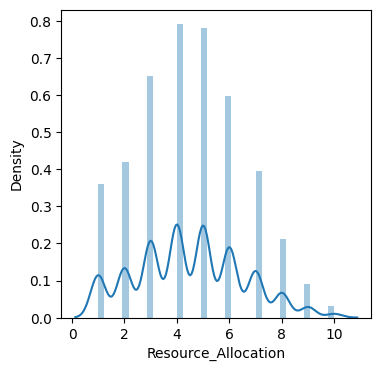

In [12]:
fig,ax=plt.subplots(figsize=(4,4))
sns.distplot(X_train.Resource_Allocation)

<ipython-input-13-a7f6a1f24b71>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train.Mental_Fatigue_Score)


<Axes: xlabel='Mental_Fatigue_Score', ylabel='Density'>

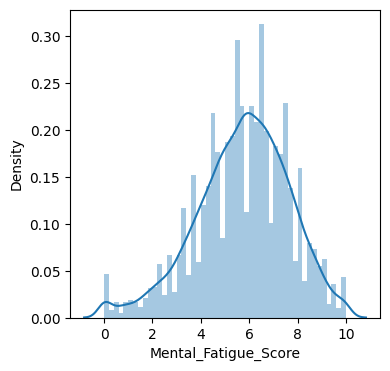

In [13]:
fig,ax=plt.subplots(figsize=(4,4))
sns.distplot(X_train.Mental_Fatigue_Score)

In [14]:
X_train['Resource_Allocation'] = X_train['Resource_Allocation'].fillna(X_train['Resource_Allocation'].mean())
X_train['Mental_Fatigue_Score'] = X_train['Mental_Fatigue_Score'].fillna(X_train['Mental_Fatigue_Score'].mean())
X_train.isnull().sum()

,0
Gender,0
Company_Type,0
WFH_Setup_Available,0
Designation,0
Resource_Allocation,0
Mental_Fatigue_Score,0
Days_Since_Joining,0


In [15]:
X_test.isnull().sum()

,0
Gender,0
Company_Type,0
WFH_Setup_Available,0
Designation,0
Resource_Allocation,248
Mental_Fatigue_Score,428
Days_Since_Joining,0


<ipython-input-16-f336e6aa54f9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_test.Mental_Fatigue_Score)


<Axes: xlabel='Mental_Fatigue_Score', ylabel='Density'>

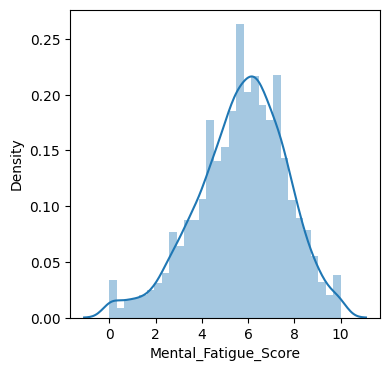

In [16]:
fig,ax=plt.subplots(figsize=(4,4))
sns.distplot(X_test.Mental_Fatigue_Score)

<ipython-input-17-3cdd8db42d67>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_test.Resource_Allocation)


<Axes: xlabel='Resource_Allocation', ylabel='Density'>

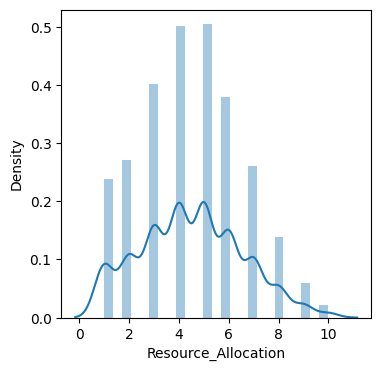

In [17]:
fig,ax=plt.subplots(figsize=(4,4))
sns.distplot(X_test.Resource_Allocation)

In [18]:
X_test['Resource_Allocation'] = X_test['Resource_Allocation'].fillna(X_test['Resource_Allocation'].mean())
X_test['Mental_Fatigue_Score'] = X_test['Mental_Fatigue_Score'].fillna(X_test['Mental_Fatigue_Score'].mean())
X_test.isnull().sum()

,0
Gender,0
Company_Type,0
WFH_Setup_Available,0
Designation,0
Resource_Allocation,0
Mental_Fatigue_Score,0
Days_Since_Joining,0


In [19]:
Y_train.isnull().sum()

np.int64(891)

In [20]:
Y_test.isnull().sum()

np.int64(233)

Since y_train and test has null values we will drop them and match rows in x_train and x_test

In [21]:

train_data = X_train.copy()
train_data['Burn_Rate'] = Y_train
train_data = train_data.dropna(subset=['Burn_Rate'])

X_train = train_data.drop(columns=['Burn_Rate'])
Y_train = train_data['Burn_Rate']

test_data = X_test.copy()
test_data['Burn_Rate'] = Y_test

test_data = test_data.dropna(subset=['Burn_Rate'])

X_test= test_data.drop(columns=['Burn_Rate'])
Y_test = test_data['Burn_Rate']


**eda**

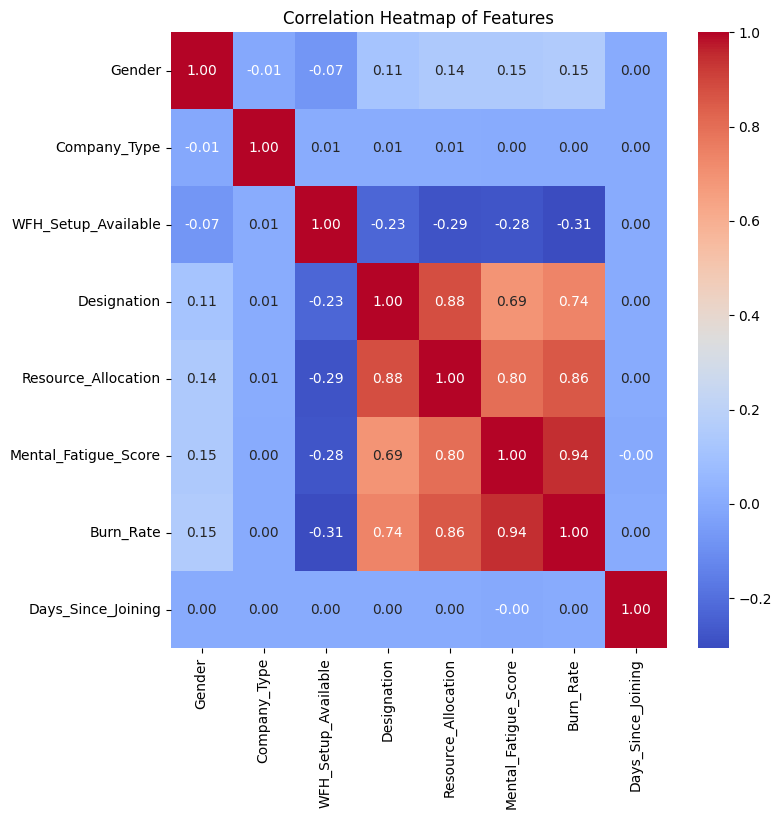

In [22]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()


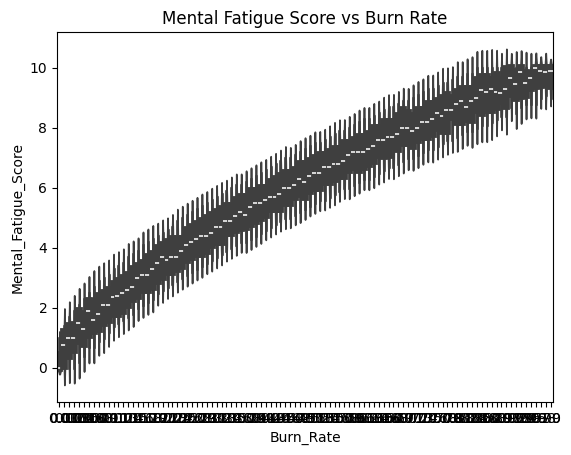

In [23]:
sns.violinplot(x='Burn_Rate', y='Mental_Fatigue_Score', data=data)
plt.title('Mental Fatigue Score vs Burn Rate')
plt.show()


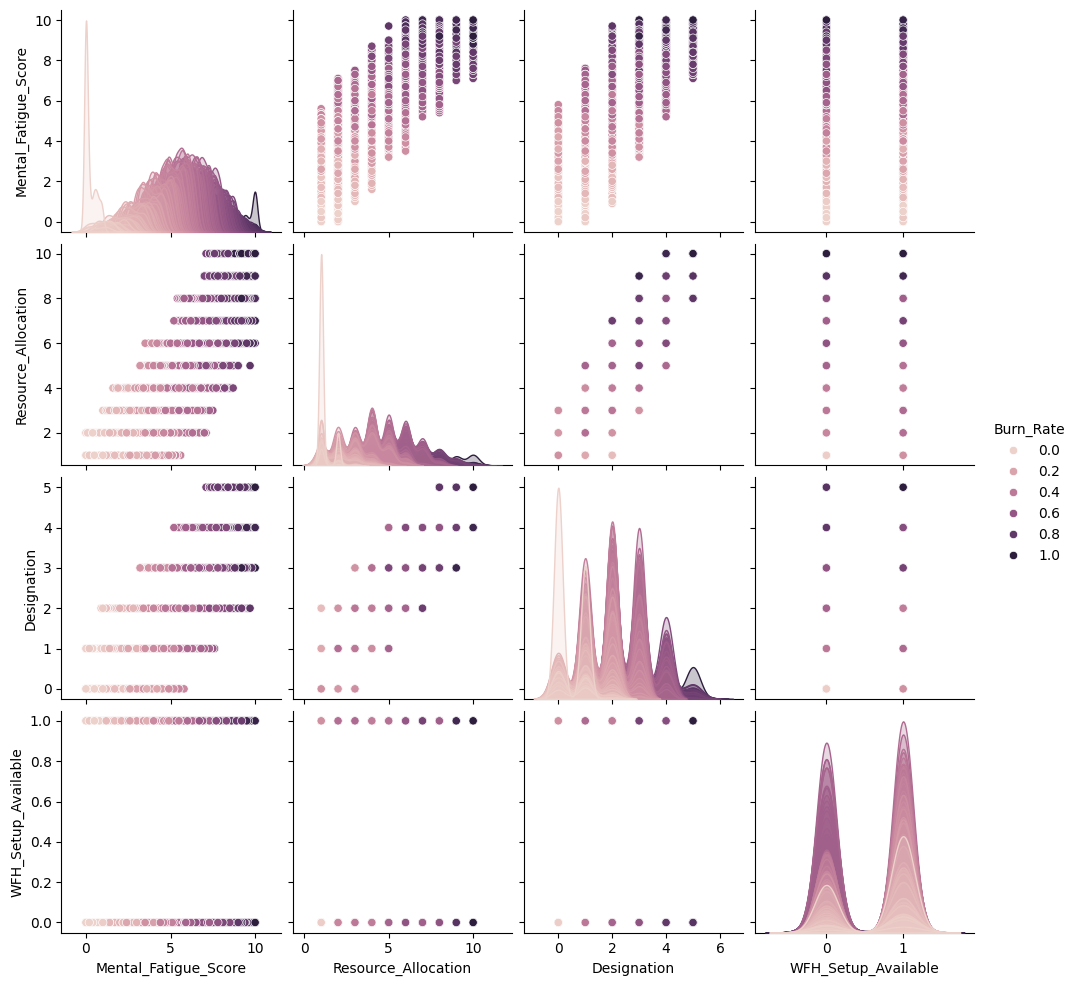

In [24]:
sns.pairplot(data, vars=['Mental_Fatigue_Score', 'Resource_Allocation', 'Designation','WFH_Setup_Available'], hue='Burn_Rate')


Text(0.5, 1.0, 'Average Feature Values by Burn Rate')

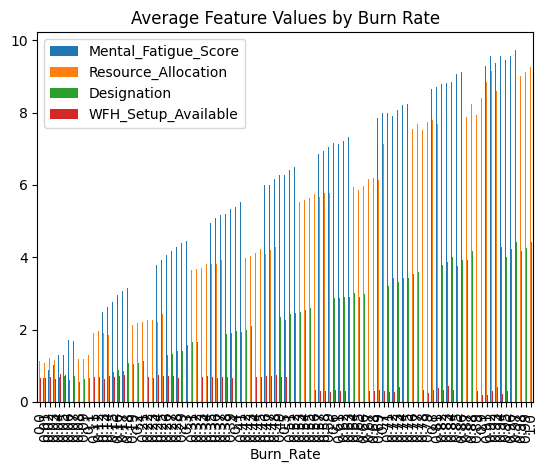

In [25]:
grouped = data.groupby('Burn_Rate')[['Mental_Fatigue_Score', 'Resource_Allocation', 'Designation','WFH_Setup_Available']].mean().reset_index()
grouped.plot(kind='bar', x='Burn_Rate')
plt.title('Average Feature Values by Burn Rate')


As we can see from the correlation and pairplots designation,resource_allocation and mental_fatigue_score,WFH_Setup_Available are the most important determinants

In [26]:
#Create new x_train and x_test
important_features = ['Mental_Fatigue_Score', 'Resource_Allocation', 'Designation','WFH_Setup_Available']
X_train = X_train[important_features]
X_test=X_test[important_features]

In [27]:
Y_test.shape

(4317,)

In [28]:
data['WFH_Setup_Available'].value_counts()

,count
WFH_Setup_Available,
1,12290
0,10460


In [29]:

#Re training the model with just these 4 features
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
model =RandomForestRegressor()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")



Mean Squared Error: 0.004526928686127523
R² Score: 0.8873852537012495


In [ ]:
#XGBoost
from xgboost import XGBRegressor
model1 = XGBRegressor()
model1.fit(X_train, Y_train)

from sklearn.metrics import mean_squared_error, r2_score
y_pred = model1.predict(X_test)
mse1 = mean_squared_error(Y_test, y_pred)
r21 = r2_score(Y_test, y1_pred)

print(f"Mean Squared Error: {mse1}")
print(f"R² Score: {r21}")

Mean Squared Error: 0.004446381098363828
R² Score: 0.8893890065301338


In [36]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(X_train,Y_train)
Y1_pred=model2.predict(X_test)
mse2 = mean_squared_error(Y_test, Y1_pred)
r22 = r2_score(Y_test, Y1_pred)

print(f"Mean Squared Error: {mse2}")
print(f"R² Score: {r22}")

Mean Squared Error: 0.005152422346432975
R² Score: 0.8718250770890945


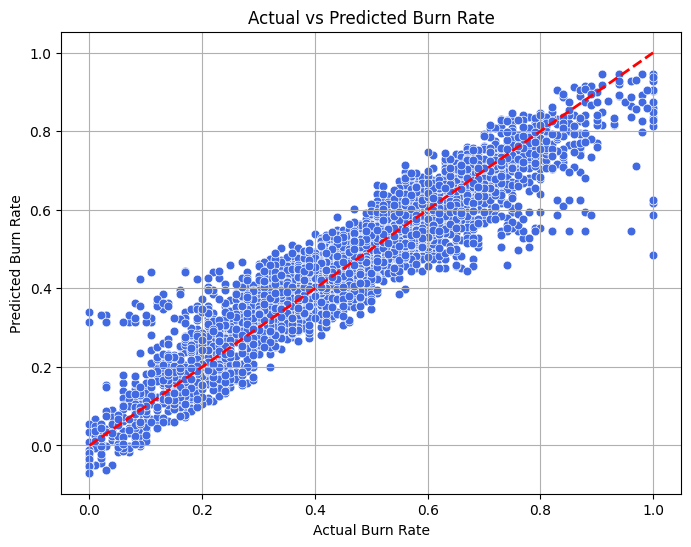

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=Y_test, y=Y_pred, color='royalblue', s=40)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Burn Rate')
plt.ylabel('Predicted Burn Rate')
plt.title('Actual vs Predicted Burn Rate')
plt.grid(True)
plt.show()

In [32]:
model.score(X_train,Y_train) #model fits the data pretty well

0.9218665981495234

In [33]:
import joblib
from google.colab import files
# Save regressor and classifier
joblib.dump(model,'burnout_regressor.pkl', compress=3)
files.download('burnout_regressor.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>